# Practica

## 1. Carga de datos

Lo primero que hacemos es cargar las cargamos librerías y funciones necesarias como hemos hecho durante el curso

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

Ahora vamos a cargar el dataset y separarlo en train y test y gardar cada uno en un fichero, para luego trabajar con el fichero de train.

In [2]:
from sklearn.model_selection import train_test_split
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
dfTrain = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


## 2. Análisis exploratorio

In [3]:
dfTrain.shape

(11824, 89)

In [4]:
dfTrain.head()

ID                            Listing Url       Scrape ID  \
0   5994463   https://www.airbnb.com/rooms/5994463  20170407214119   
1  14136180  https://www.airbnb.com/rooms/14136180  20170407214119   
2  15520134  https://www.airbnb.com/rooms/15520134  20170407214119   
3   8809721   https://www.airbnb.com/rooms/8809721  20170407214119   
4   1162707   https://www.airbnb.com/rooms/1162707  20170407214119   

  Last Scraped                                            Name  \
0   2017-04-08                PISO ATOCHA- FLAT NEAR ATOCHA  .   
1   2017-04-08                          The Palace Sol Madrid.   
2   2017-04-08  por persona la noche metro linea5 vista alegre   
3   2017-04-08             CITY CENTER JACINTO BENAVENTE ROOM4   
4   2017-04-08              NICE & BIG DOUBLE ROOM AT DOWNTOWN   

                                             Summary  \
0  Piso recién reformado cómoda habitación con ba...   
1  Lugares de interés: Plaza Mayor, Plaza del Sol...   
2  我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...   
3  This stunning and amazig room is covered with ...   
4                                                NaN   

                                               Space  \
0  Un piso muy cómodo en Jerónimos, una de las zo...   
1  El apartamento dispone de un dormitorio indepe...   
2                                                NaN   
3                                                NaN   
4  We are a young couple; David (Spain) and Ana (...   

                                         Description Experiences Offered  \
0  Piso recién reformado cómoda habitación con ba...                none   
1  Lugares de interés: Plaza Mayor, Plaza del Sol...                none   
2  我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...                none   
3  This stunning and amazig room is covered with ...                none   
4  We are a young couple; David (Spain) and Ana (...                none   

                               Neighborhood Overview  \
0  El barrio de Jeronimos es un enclave tranquilo...   
1  Situado en el corazón de Madrid, este apartame...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               Notes  \
0  Facilitamos guía de eventos y rutas turísticas...   
1  Hora llegada: a partir de las 15:00 horas Hora...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                             Transit  \
0  Excelente ubicación a tan solo 5 minutos andan...   
1  Acceso a todos los medios de trasporte, BUS, M...   
2  羚羊Casa出发 --地铁Metro 5号线vsita alegre--opera转乘2号线...   
3                                                NaN   
4                                                NaN   

                                              Access  \
0  La conexión a internet por fibra óptica 100 MB...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  WE CAN DO TO HOST COLLECTION SERVICE FROM THE ...   

                                         Interaction  \
0  Recibimos personalmente a nuestros huéspedes y...   
1  Estimado huésped estaremos disponible todo el ...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         House Rules  \
0  El apartamento se encuentra en un edificio res...   
1  - Oír música con volumen moderado. Entrada a p...   
2                                                NaN   
3                                                NaN   
4  In the apartment smoking is not allowed, but i...   

                                      

Como es un dataset muy grande cambiamos la vista con la transpuesta

In [5]:
dfTrain.head().T

0  \
ID                                                                        5994463   
Listing Url                                  https://www.airbnb.com/rooms/5994463   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
Summary                         Piso recién reformado cómoda habitación con ba...   
Space                           Un piso muy cómodo en Jerónimos, una de las zo...   
Description                     Piso recién reformado cómoda habitación con ba...   
Experiences Offered                                                          none   
Neighborhood Overview           El barrio de Jeronimos es un enclave tranquilo...   
Notes                           Facilitamos guía de eventos y rutas turísticas...   
Transit                         Excelente ubicación a tan solo 5 minutos andan...   
Access                          La conexión a internet por fibra óptica 100 MB...   
Interaction                     Recibimos personalmente a nuestros huéspedes y...   
House Rules                     El apartamento se encuentra en un edificio res...   
Thumbnail Url                   https://a0.muscache.com/im/pictures/74652419/f...   
Medium Url                      https://a0.muscache.com/im/pictures/74652419/f...   
Picture Url                     https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                  https://a0.muscache.com/im/pictures/74652419/f...   
Host ID                                                                  31124866   
Host URL                               https://www.airbnb.com/users/show/31124866   
Host Name                                                                   Inava   
Host Since                                                             2015-04-13   
Host Location                           Arroyomolinos, Comunidad de Madrid, Spain   
Host About                                                                    NaN   
Host Response Time                                             within a few hours   
Host Response Rate                                                            100   
Host Acceptance Rate                                                          NaN   
Host Thumbnail Url              https://a0.muscache.com/im/users/31124866/prof...   
Host Picture Url                https://a0.muscache.com/im/users/31124866/prof...   
Host Neighbourhood                                                      Jerónimos   
Host Listings Count                                                             2   
Host Total Listings Count                                                       2   
Host Verifications                                 email,phone,reviews,work_email   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
City                                                                       Madrid   
State                                                         Comunidad de Madrid   
Zipcode                                                                     28014   
Market                                                                     Madrid   
Smart Location                                                      Madrid, Spain   
Country Code                                                                   ES   
Country                                                                     Spain   
Latitude                                                                  40.4077   
Longitude                                                                -3.68482   


Voy a ir eliminando columnas que no sirven para el cáculo del precio, empezaremos por:
ID, Listing Url,Scrape ID,Thumbnail Url,Medium Url,Picture Url,XL Picture Url, Host ID,Host URL,Host Name,Host Thumbnail Url,Host Picture Url,Calendar Updated,Calendar last Scraped, Geolocation 

In [6]:
columnas_borrar = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',  'Calendar Updated', 'Calendar last Scraped', 
     'Geolocation'
]



In [7]:
dfTrain.drop(columnas_borrar, axis=1, inplace=True)

In [8]:
dfTrain.head().T

0  \
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
Summary                         Piso recién reformado cómoda habitación con ba...   
Space                           Un piso muy cómodo en Jerónimos, una de las zo...   
Description                     Piso recién reformado cómoda habitación con ba...   
Experiences Offered                                                          none   
Neighborhood Overview           El barrio de Jeronimos es un enclave tranquilo...   
Notes                           Facilitamos guía de eventos y rutas turísticas...   
Transit                         Excelente ubicación a tan solo 5 minutos andan...   
Access                          La conexión a internet por fibra óptica 100 MB...   
Interaction                     Recibimos personalmente a nuestros huéspedes y...   
House Rules                     El apartamento se encuentra en un edificio res...   
Host Since                                                             2015-04-13   
Host Location                           Arroyomolinos, Comunidad de Madrid, Spain   
Host About                                                                    NaN   
Host Response Time                                             within a few hours   
Host Response Rate                                                            100   
Host Acceptance Rate                                                          NaN   
Host Listings Count                                                             2   
Host Total Listings Count                                                       2   
Host Verifications                                 email,phone,reviews,work_email   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
City                                                                       Madrid   
State                                                         Comunidad de Madrid   
Zipcode                                                                     28014   
Market                                                                     Madrid   
Smart Location                                                      Madrid, Spain   
Country Code                                                                   ES   
Country                                                                     Spain   
Latitude                                                                  40.4077   
Longitude                                                                -3.68482   
Property Type                                                           Apartment   
Room Type                                                         Entire home/apt   
Accommodates                                                                    4   
Bathrooms                                                                       1   
Bedrooms                                                                        1   
Beds                                                                            2   
Bed Type                                                                 Real Bed   
Amenities                       TV,Internet,Wireless Internet,Air conditioning...   
Square Feet                                                                   NaN   
Price                                                                          60   
Weekly Price                                                                  550   
Monthly Price                                                                1250   
Security Deposit                                                              NaN   
Cleaning Fee                                                                   25   


Ahora vamos a eliminar la mayoría de las columnas con texto libre ya que no corresponde con el tema a tratar   

Eliminamos las columnas Name, Summary,Description, Notes, Transit, Access, Interaction,House Rulestion, House Rules, Host Location, Host About, Host Response Time, Host Verifications	

In [9]:
columnas_texto = [
    'Name', 'Summary','Description', 'Notes', 'Transit', 'Access', 'Interaction','House Rules', 
     'Host Location', 'Host About', 'Host Response Time', 'Host Verifications','Space','Neighborhood Overview'
]
dfTrain.drop(columnas_texto, axis=1, inplace=True)

In [10]:
dfTrain.head().T

0  \
Experiences Offered                                                          none   
Host Since                                                             2015-04-13   
Host Response Rate                                                            100   
Host Acceptance Rate                                                          NaN   
Host Listings Count                                                             2   
Host Total Listings Count                                                       2   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
City                                                                       Madrid   
State                                                         Comunidad de Madrid   
Zipcode                                                                     28014   
Market                                                                     Madrid   
Smart Location                                                      Madrid, Spain   
Country Code                                                                   ES   
Country                                                                     Spain   
Latitude                                                                  40.4077   
Longitude                                                                -3.68482   
Property Type                                                           Apartment   
Room Type                                                         Entire home/apt   
Accommodates                                                                    4   
Bathrooms                                                                       1   
Bedrooms                                                                        1   
Beds                                                                            2   
Bed Type                                                                 Real Bed   
Amenities                       TV,Internet,Wireless Internet,Air conditioning...   
Square Feet                                                                   NaN   
Price                                                                          60   
Weekly Price                                                                  550   
Monthly Price                                                                1250   
Security Deposit                                                              NaN   
Cleaning Fee                                                                   25   
Guests Included                                                                 1   
Extra People                                                                    0   
Minimum Nights                                                                  2   
Maximum Nights                                                               1125   
Has Availability                                                              NaN   
Availability 30                                                                 9   
Availability 60                                                                32   
Availability 90                                                                52   
Availability 365                                                              117   
Number of Reviews                                                              12   
First Review                                                           2015-04-26   
Last Review                                                            2017-02-28   
Review Scores Rating                                                           95   
Review Scores Accuracy                                                          9   


Observamos los datos de Country, Country Code , City y vemos que nos vamos a ceñir a la ciudad de Madrid.

In [11]:
dfTrain['Country'].unique()
dfTrain['Country'].value_counts()

Spain             11203
United States       139
United Kingdom      127
France               87
Italy                61
Australia            38
Ireland              34
Germany              33
Austria              26
Netherlands          19
Canada               16
Belgium              16
Denmark              14
Switzerland           4
Greece                3
Hong Kong             2
Cuba                  1
Name: Country, dtype: int64

In [12]:
dfTrain['Country Code'].unique()
dfTrain['Country Code'].value_counts()

ES    11203
US      139
GB      127
FR       87
IT       61
AU       38
IE       34
DE       33
AT       26
NL       19
CA       16
BE       16
DK       14
CH        4
GR        3
HK        2
It        1
CU        1
Name: Country Code, dtype: int64

In [13]:
dfTrain['City'].unique()
dfTrain['City'].value_counts()

Madrid                                 10567
Barcelona                                235
London                                   104
Paris                                     85
Palma                                     44
马德里                                       43
Roma                                      33
Berlin                                    32
Alcúdia                                   31
Dublin                                    29
New York                                  27
Los Angeles                               26
Brooklyn                                  22
Wien                                      20
Amsterdam                                 19
Rome                                      16
Madrid, Comunidad de Madrid, ES           14
Toronto                                   13
Inca                                      12
Palma de Mallorca                         11
Pollença                                  10
Washington                                 9
Bondi Beac

In [14]:
dfTrain['State'].unique()
dfTrain['State'].value_counts()

Comunidad de Madrid               8507
Community of Madrid               1497
Madrid                             543
Catalunya                          154
Balearic Islands                   137
Illes Balears                      136
Île-de-France                       85
NY                                  53
CA                                  51
Lazio                               49
England                             45
Catalonia                           44
马德里自治区                              40
Berlin                              32
Dublin                              29
NSW                                 28
Barcelona                           27
Wien                                20
Islas Baleares                      15
ON                                  13
Veneto                              10
Noord-Holland                       10
DC                                   9
PM                                   9
North Holland                        9
Bruxelles                

In [15]:
dfTrain['Market'].unique()
dfTrain['Market'].value_counts()


Madrid                   10621
Mallorca Island            300
Barcelona                  235
London                     113
Paris                       88
New York                    53
Rome                        49
Los Angeles                 37
Dublin                      34
Berlin                      33
Sydney                      29
Vienna                      26
Amsterdam                   19
Copenhagen                  13
Brussels                    13
Toronto                     13
Venice                      12
Other (International)        8
D.C.                         8
Melbourne                    8
San Francisco                8
Chicago                      8
Edinburgh                    7
Seattle                      6
Manchester                   4
San Diego                    4
Geneva                       4
New Orleans                  4
Austin                       3
Antwerp                      3
Denver                       3
Montreal                     2
Athens  

In [16]:
dfTrain['Smart Location'].unique()
dfTrain['Smart Location'].value_counts()

Madrid, Spain                                 10561
Barcelona, Spain                                233
London, United Kingdom                          101
Paris, France                                    85
Palma, Spain                                     44
马德里, Spain                                       43
Roma, Italy                                      33
Berlin, Germany                                  32
Alcúdia, Spain                                   31
Dublin, Ireland                                  28
New York, NY                                     27
Los Angeles, CA                                  26
Brooklyn, NY                                     21
Wien, Austria                                    20
Amsterdam, Netherlands                           19
Rome, Italy                                      16
Madrid, Comunidad de Madrid, ES, Spain           14
Toronto, Canada                                  13
Inca, Spain                                      12
Pollença, Sp

Creamos un filtro con las filas que tenga City distintas de Madrid 

In [17]:
df_Madrid = dfTrain[dfTrain['City']!='Madrid']

In [18]:
df_Madrid.shape

(1257, 58)

Eliminamos del dfTest todo lo que no sea de Madrid capital

In [19]:
dfTrain.drop(df_Madrid.index, inplace = True)

In [20]:
dfTrain.shape

(10567, 58)

In [21]:
dfTrain['City'].unique()
dfTrain['City'].value_counts()


Madrid    10567
Name: City, dtype: int64

In [22]:
dfTrain['Country'].unique()
dfTrain['Country'].value_counts()


Spain    10567
Name: Country, dtype: int64

In [23]:
dfTrain['Country Code'].unique()
dfTrain['Country Code'].value_counts()


ES    10567
Name: Country Code, dtype: int64

In [24]:
dfTrain['State'].unique()
dfTrain['State'].value_counts()


Comunidad de Madrid             8495
Community of Madrid             1492
Madrid                           523
España                             4
Spain                              4
Communauté de Madrid               3
28                                 2
MADRID                             2
Espańa                             1
España,Madrid                      1
Autonome Gemeinschaft Madrid       1
Madrid capital                     1
madrid                             1
Name: State, dtype: int64

In [25]:
dfTrain['Market'].unique()
dfTrain['Market'].value_counts()


Madrid                   10520
Other (International)        6
Toledo                       1
Deauville                    1
Name: Market, dtype: int64

In [26]:
dfTrain['Smart Location'].unique()
dfTrain['Smart Location'].value_counts()

Madrid, Spain     10559
Madrid , Spain        8
Name: Smart Location, dtype: int64

Puesto que nos ceñimos a Madrid ahora podemos eliminar las columnas City, Country, Country Code, State, Market, Smart Location puesto que no nos aportan nada para el modelo.

In [27]:
columnas_loc = [
    'City', 'Country','Country Code', 'State', 'Market', 'Smart Location'
]
dfTrain.drop(columnas_loc, axis=1, inplace=True)

In [28]:
dfTrain.head().T

0  \
Experiences Offered                                                          none   
Host Since                                                             2015-04-13   
Host Response Rate                                                            100   
Host Acceptance Rate                                                          NaN   
Host Listings Count                                                             2   
Host Total Listings Count                                                       2   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
Zipcode                                                                     28014   
Latitude                                                                  40.4077   
Longitude                                                                -3.68482   
Property Type                                                           Apartment   
Room Type                                                         Entire home/apt   
Accommodates                                                                    4   
Bathrooms                                                                       1   
Bedrooms                                                                        1   
Beds                                                                            2   
Bed Type                                                                 Real Bed   
Amenities                       TV,Internet,Wireless Internet,Air conditioning...   
Square Feet                                                                   NaN   
Price                                                                          60   
Weekly Price                                                                  550   
Monthly Price                                                                1250   
Security Deposit                                                              NaN   
Cleaning Fee                                                                   25   
Guests Included                                                                 1   
Extra People                                                                    0   
Minimum Nights                                                                  2   
Maximum Nights                                                               1125   
Has Availability                                                              NaN   
Availability 30                                                                 9   
Availability 60                                                                32   
Availability 90                                                                52   
Availability 365                                                              117   
Number of Reviews                                                              12   
First Review                                                           2015-04-26   
Last Review                                                            2017-02-28   
Review Scores Rating                                                           95   
Review Scores Accuracy                                                          9   
Review Scores Cleanliness                                                      10   
Review Scores Checkin                                                          10   
Review Scores Communication                                                    10   
Review Scores Location                                                         10   
Review Scores Value                                                             9   
License                                                                       NaN   


Buscamos el porcentaje de valores nulos en columnas

In [29]:
(len(dfTrain) - dfTrain.count())/len(dfTrain)*100

Experiences Offered                 0.000000
Host Since                          0.028390
Host Response Rate                 12.425476
Host Acceptance Rate              100.000000
Host Listings Count                 0.028390
Host Total Listings Count           0.028390
Street                              0.000000
Neighbourhood                      33.377496
Neighbourhood Cleansed              0.000000
Neighbourhood Group Cleansed        0.000000
Zipcode                             3.283808
Latitude                            0.000000
Longitude                           0.000000
Property Type                       0.000000
Room Type                           0.000000
Accommodates                        0.000000
Bathrooms                           0.378537
Bedrooms                            0.170342
Beds                                0.350147
Bed Type                            0.000000
Amenities                           0.851708
Square Feet                        96.091606
Price     

Vamos a elimina en nuestro caso todas las columnas queesten por encima del 95% de nulos, que sería las columnas Host Acceptance Rate, Square Feet, Has Availability, License,Jurisdiction Names

In [30]:
columnas_nulos = [
    'Host Acceptance Rate', 'Square Feet','Has Availability','License', 'Jurisdiction Names'
]
dfTrain.drop(columnas_nulos, axis=1, inplace=True)

In [31]:
dfTrain.head().T

0  \
Experiences Offered                                                          none   
Host Since                                                             2015-04-13   
Host Response Rate                                                            100   
Host Listings Count                                                             2   
Host Total Listings Count                                                       2   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
Zipcode                                                                     28014   
Latitude                                                                  40.4077   
Longitude                                                                -3.68482   
Property Type                                                           Apartment   
Room Type                                                         Entire home/apt   
Accommodates                                                                    4   
Bathrooms                                                                       1   
Bedrooms                                                                        1   
Beds                                                                            2   
Bed Type                                                                 Real Bed   
Amenities                       TV,Internet,Wireless Internet,Air conditioning...   
Price                                                                          60   
Weekly Price                                                                  550   
Monthly Price                                                                1250   
Security Deposit                                                              NaN   
Cleaning Fee                                                                   25   
Guests Included                                                                 1   
Extra People                                                                    0   
Minimum Nights                                                                  2   
Maximum Nights                                                               1125   
Availability 30                                                                 9   
Availability 60                                                                32   
Availability 90                                                                52   
Availability 365                                                              117   
Number of Reviews                                                              12   
First Review                                                           2015-04-26   
Last Review                                                            2017-02-28   
Review Scores Rating                                                           95   
Review Scores Accuracy                                                          9   
Review Scores Cleanliness                                                      10   
Review Scores Checkin                                                          10   
Review Scores Communication                                                    10   
Review Scores Location                                                         10   
Review Scores Value                                                             9   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                  2   
Reviews per Month                                                             0.5   
Features                        Host Has Profile Pic,Is Location Exact,Require...   


Vamos a eliminar las  columnas Weekly Price,Monthly Price para que no desvirtuen el precio del piso

In [32]:
dfTrain.drop([
    'Weekly Price', 'Monthly Price'
], axis=1, inplace=True)

Como no estamos haciendo una estimacion temporal del precio vamos a eliminar las columnas First Review, Last Review

In [33]:
dfTrain.drop([
    'First Review', 'Last Review'
], axis=1, inplace=True)

In [34]:
dfTrain['Amenities'].unique()
dfTrain['Amenities'].value_counts()

TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                                                                                                                                                                                                                                                                                                      38
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron                                                                                                                                                                                                                                                                                                                                                    25
TV,Internet,Wi

In [35]:
dfTrain['Features'].unique()
dfTrain['Features'].value_counts()

Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License                                                                                                      1903
Host Has Profile Pic,Is Location Exact,Requires License                                                                                                                             1668
Host Has Profile Pic,Host Identity Verified,Is Location Exact,Requires License,Instant Bookable                                                                                     1294
Host Has Profile Pic,Host Identity Verified,Requires License                                                                                                                        1074
Host Has Profile Pic,Requires License                                                                                                                                               1037
Host Has Profile Pic,Is Location Exact,Requires License,Instant Bookable   

Creación de nuevas variables:

In [36]:
dfTrain['Features'].fillna("", inplace=True) 

dfTrain['Features'] = dfTrain['Features'].apply(lambda x: len(str(x).split(',')))



In [37]:
dfTrain['Amenities'].fillna("", inplace=True)
dfAireAcondicionado = dfTrain['Amenities'].str.contains("conditioning") 
print(dfAireAcondicionado.value_counts()) 


True     5807
False    4760
Name: Amenities, dtype: int64


In [38]:
dfTrain['AireAcondicionado']=dfAireAcondicionado
print(dfTrain['AireAcondicionado'].value_counts()) 

True     5807
False    4760
Name: AireAcondicionado, dtype: int64


In [39]:
dfInternet = dfTrain['Amenities'].str.contains("Internet") 
print(dfInternet.value_counts()) 

True     10064
False      503
Name: Amenities, dtype: int64


In [40]:
dfTrain['Internet']=dfInternet

In [41]:
dfParking=dfTrain['Amenities'].str.contains("Free parking") 
print(dfParking.value_counts()) 
dfTrain['Parking']=dfParking

False    9824
True      743
Name: Amenities, dtype: int64


In [42]:
dfTrain.drop([
    'Amenities'
], axis=1, inplace=True)

In [43]:
dfTrain.dtypes

Experiences Offered                object
Host Since                         object
Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Street                             object
Neighbourhood                      object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
Zipcode                            object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                      

In [44]:
dfTrain.head().T

0  \
Experiences Offered                                                          none   
Host Since                                                             2015-04-13   
Host Response Rate                                                            100   
Host Listings Count                                                             2   
Host Total Listings Count                                                       2   
Street                          Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                           Jerónimos   
Neighbourhood Cleansed                                                  Jerónimos   
Neighbourhood Group Cleansed                                               Retiro   
Zipcode                                                                     28014   
Latitude                                                                  40.4077   
Longitude                                                                -3.68482   
Property Type                                                           Apartment   
Room Type                                                         Entire home/apt   
Accommodates                                                                    4   
Bathrooms                                                                       1   
Bedrooms                                                                        1   
Beds                                                                            2   
Bed Type                                                                 Real Bed   
Price                                                                          60   
Security Deposit                                                              NaN   
Cleaning Fee                                                                   25   
Guests Included                                                                 1   
Extra People                                                                    0   
Minimum Nights                                                                  2   
Maximum Nights                                                               1125   
Availability 30                                                                 9   
Availability 60                                                                32   
Availability 90                                                                52   
Availability 365                                                              117   
Number of Reviews                                                              12   
Review Scores Rating                                                           95   
Review Scores Accuracy                                                          9   
Review Scores Cleanliness                                                      10   
Review Scores Checkin                                                          10   
Review Scores Communication                                                    10   
Review Scores Location                                                         10   
Review Scores Value                                                             9   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                  2   
Reviews per Month                                                             0.5   
Features                                                                        3   
AireAcondicionado                                                            True   
Internet                                                                     True   
Parking                                                                     False   

                                                                       1  \
Experiences Offered                                                 none   
Host Since       

Miramos ls valores de Experiences Offered y vemos que no aporta nada por tanto eliminamos la columna

In [45]:
print(dfTrain['Experiences Offered'].value_counts()) 
dfTrain.drop(['Experiences Offered'], axis=1, inplace=True)

none    10567
Name: Experiences Offered, dtype: int64


Miramos la columna Street es un String que en este módulo no aporta mucho , por tanto tambien lo eliminamos

In [46]:
print(dfTrain['Street'].value_counts()) 

Embajadores, Madrid, Comunidad de Madrid 28012, Spain            480
Madrid, Comunidad de Madrid 28012, Spain                         426
Madrid, Comunidad de Madrid 28004, Spain                         390
Malasaña, Madrid, Comunidad de Madrid 28004, Spain               370
La Latina, Madrid, Comunidad de Madrid 28005, Spain              369
Justicia, Madrid, Comunidad de Madrid 28004, Spain               317
Madrid, Comunidad de Madrid 28005, Spain                         276
Cortes, Madrid, Comunidad de Madrid 28014, Spain                 249
Sol, Madrid, Comunidad de Madrid 28013, Spain                    238
Madrid, Comunidad de Madrid, Spain                               193
Palacio, Madrid, Comunidad de Madrid 28013, Spain                192
Madrid, Comunidad de Madrid 28013, Spain                         167
Argüelles, Madrid, Comunidad de Madrid 28008, Spain              144
La Latina, Madrid, Comunidad de Madrid 28012, Spain              135
Sol, Madrid, Comunidad de Madrid 2

In [47]:
dfTrain.drop(['Street'], axis=1, inplace=True)

La columna Zipcode, tal y como está rellena , teniemdo la latitud y la longitud y el barrio, creo que para situar el piso es sufienciente igual me equivoco pero por ahora no la voy a tener en cuenta

In [48]:
print(dfTrain['Zipcode'].value_counts()) 

28012           1660
28004           1423
28005            985
28013            812
28014            502
28015            478
28045            392
28010            308
28008            276
28028            211
28011            198
28001            184
28006            184
28009            178
28019            167
28007            164
28020            158
28003            152
28002            132
28039            126
28027            100
28025             94
28017             86
28043             85
28029             76
28042             75
28026             72
28053             70
28033             67
28030             60
28038             60
28016             59
28036             55
28041             53
28047             50
28035             49
28037             46
28021             42
28050             41
28034             33
28024             33
28018             30
28032             28
28046             26
28022             24
28031             24
28044             16
28023        

In [49]:
dfTrain.drop(['Zipcode'], axis=1, inplace=True)

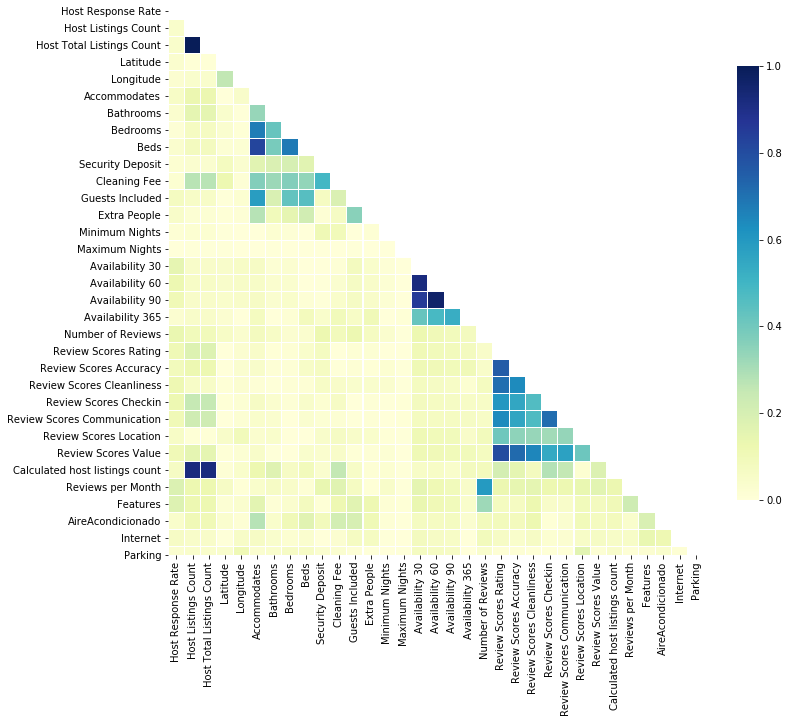

In [50]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(dfTrain.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

Vamos a ir quitando variables que tiene una gran correlación entre sí:
   Host Total Listings Count, Calculated host listings count estan fuertemente correladas con  Host Listings Count 
   Accommodates esta fuertemente correlada con Beds

In [51]:
columnas_cr = [
    'Host Total Listings Count', 'Calculated host listings count','Accommodates'
]
dfTrain.drop(columnas_cr, axis=1, inplace=True)

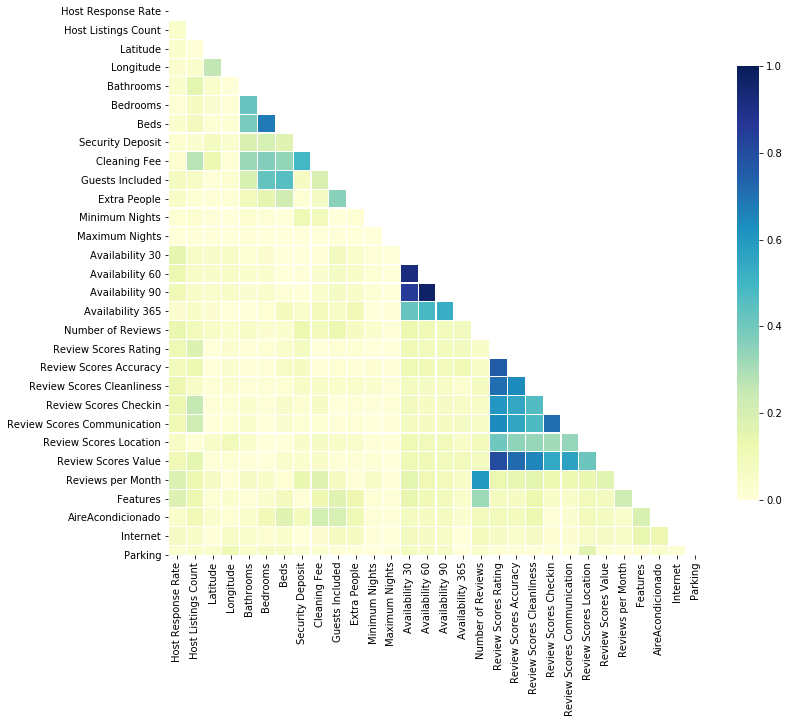

In [52]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(dfTrain.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

Voy a eliminar la Availability 60 que está fuertemente correlada con Availability 30 y Availability 90

In [53]:
dfTrain.drop(['Availability 60'], axis=1, inplace=True)

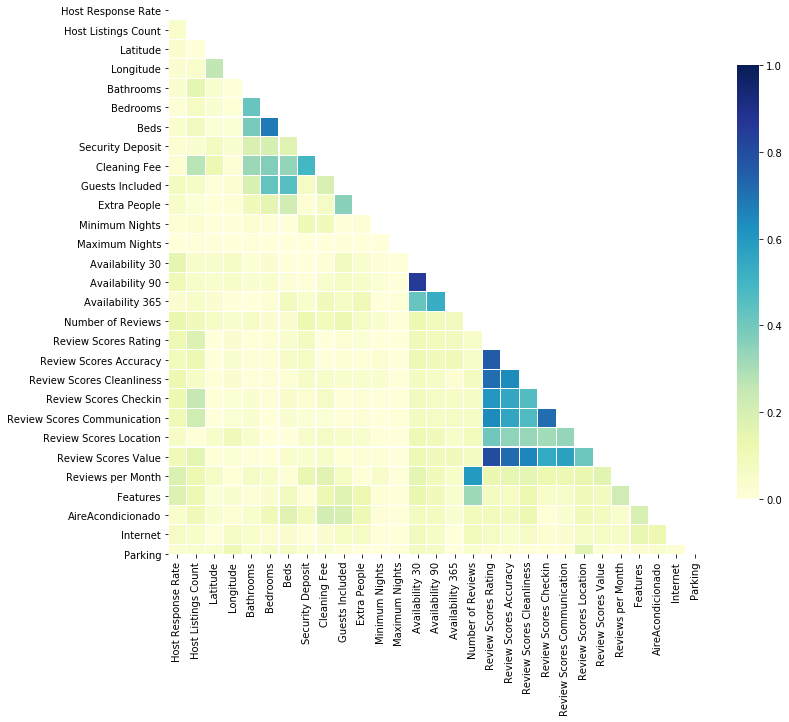

In [54]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(dfTrain.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [55]:
dfTrain.drop(['Availability 90'], axis=1, inplace=True)

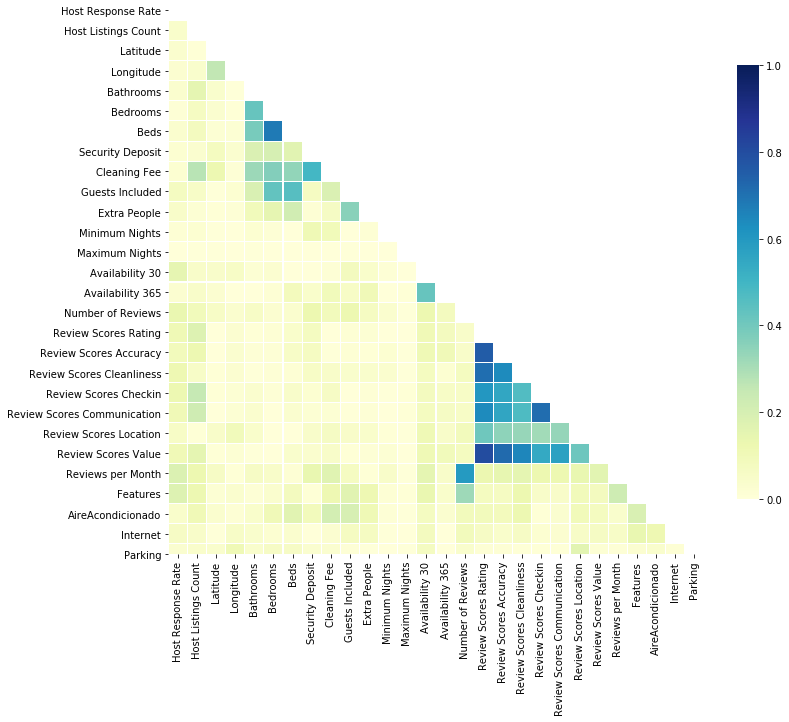

In [56]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(dfTrain.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [57]:
dfTrain.drop(['Review Scores Rating'], axis=1, inplace=True)

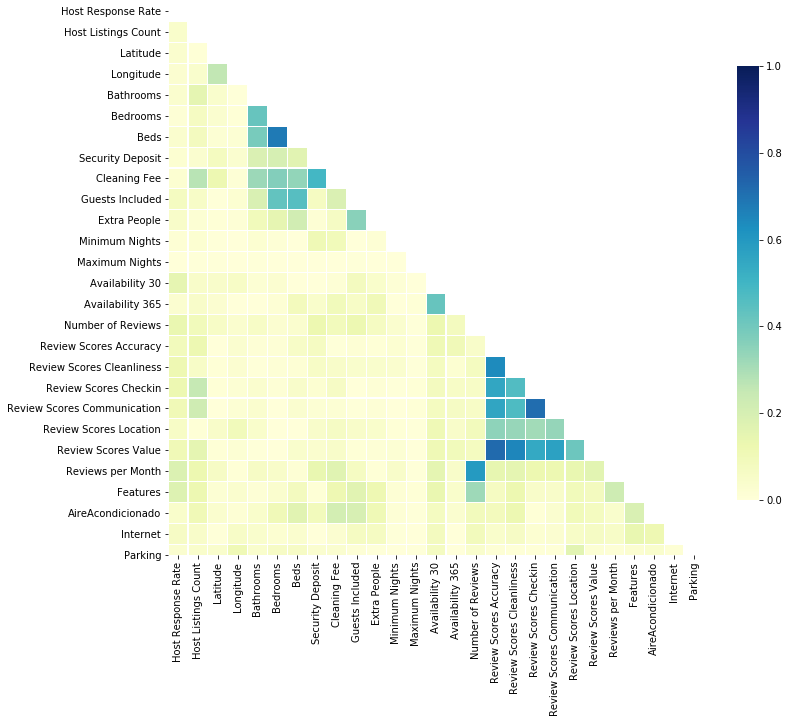

In [58]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(dfTrain.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# puedo representar solo la parte inferior ya que es simétrica

In [59]:
dfTrain.dtypes

Host Since                       object
Host Response Rate              float64
Host Listings Count             float64
Neighbourhood                    object
Neighbourhood Cleansed           object
Neighbourhood Group Cleansed     object
Latitude                        float64
Longitude                       float64
Property Type                    object
Room Type                        object
Bathrooms                       float64
Bedrooms                        float64
Beds                            float64
Bed Type                         object
Price                           float64
Security Deposit                float64
Cleaning Fee                    float64
Guests Included                   int64
Extra People                      int64
Minimum Nights                    int64
Maximum Nights                    int64
Availability 30                   int64
Availability 365                  int64
Number of Reviews                 int64
Review Scores Accuracy          float64


In [60]:
dfTrain.shape

(10567, 36)

In [61]:
print(dfTrain['Neighbourhood'].count())
print(dfTrain['Neighbourhood'].value_counts()) 
print(dfTrain['Neighbourhood'].unique())

7040
Malasaña               693
La Latina              649
Embajadores            638
Sol                    592
Cortes                 457
Justicia               439
Palacio                321
Aluche                 182
Argüelles              178
Trafalgar              164
Carabanchel            157
Ciudad Lineal          146
Palos do Moguer        142
Goya                   130
Guindalera             104
Puente de Vallecas      98
Recoletos               95
Arapiles                92
Almagro                 83
Pacifico                83
Hortaleza               75
Gaztambide              73
Lista                   67
Acacias                 63
Cuatro Caminos          63
Castellana              62
Fuencarral-el Pardo     59
Ibiza                   58
Delicias                54
Usera                   53
San Blas                52
Rios Rosas              49
La Chopera              47
Prosperidad             46
Castillejos             46
Imperial                44
Fuente del Berro       

In [62]:
print(dfTrain['Neighbourhood Cleansed'].count())
print(dfTrain['Neighbourhood Cleansed'].value_counts()) 
print(dfTrain['Neighbourhood Cleansed'].unique())

10567
Embajadores                     1479
Universidad                     1057
Palacio                          882
Sol                              771
Justicia                         630
Cortes                           600
Trafalgar                        256
Argüelles                        216
Palos de Moguer                  210
Goya                             188
Puerta del Angel                 156
Guindalera                       143
Arapiles                         139
Recoletos                        139
Acacias                          120
Almagro                          119
Pacífico                         114
Gaztambide                       111
Lista                            107
Cuatro Caminos                   103
Delicias                          98
Chopera                           91
Ibiza                             87
Rios Rosas                        87
Castellana                        85
San Isidro                        75
Prosperidad                     

In [63]:
print(dfTrain['Neighbourhood Group Cleansed'].count())
print(dfTrain['Neighbourhood Group Cleansed'].value_counts())
print(dfTrain['Neighbourhood Group Cleansed'].unique())

10567
Centro                   5419
Chamberí                  764
Salamanca                 718
Arganzuela                636
Tetuán                    363
Retiro                    355
Moncloa - Aravaca         335
Latina                    293
Carabanchel               286
Chamartín                 279
Ciudad Lineal             243
Puente de Vallecas        169
Hortaleza                 138
Usera                     115
Fuencarral - El Pardo     114
San Blas - Canillejas      90
Barajas                    66
Moratalaz                  61
Villaverde                 59
Villa de Vallecas          37
Vicálvaro                  27
Name: Neighbourhood Group Cleansed, dtype: int64
['Retiro' 'Centro' 'Carabanchel' 'Chamberí' 'Salamanca'
 'Moncloa - Aravaca' 'Usera' 'Chamartín' 'Ciudad Lineal' 'Arganzuela'
 'Tetuán' 'Barajas' 'Vicálvaro' 'Puente de Vallecas' 'Latina' 'Moratalaz'
 'Fuencarral - El Pardo' 'Hortaleza' 'Villaverde' 'San Blas - Canillejas'
 'Villa de Vallecas']


Observando los tres campos, parece que me voy a quedar con Neighbourhood Cleansed porque el Neighbourhood Group Cleansed parece que es el Distrito y Neighbourhood tiene valores nulos se parece mucho a Neighbourhood Cleansed

In [64]:
dfTrain.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)

In [65]:
print(dfTrain['Host Since'].count())
print(dfTrain['Host Since'].value_counts())
print(dfTrain['Host Since'].unique())

10564
2014-09-19    122
2014-05-08     86
2016-01-12     70
2017-02-23     62
2012-09-14     59
2015-04-07     49
2015-02-10     47
2011-11-15     45
2015-04-27     43
2013-03-20     41
2016-02-23     39
2014-09-18     38
2016-09-21     33
2015-02-20     33
2012-01-25     31
2012-02-08     31
2012-07-19     30
2013-06-25     27
2011-05-17     26
2013-05-08     26
2012-06-01     26
2016-03-30     25
2015-03-05     25
2016-08-12     25
2015-12-18     24
2014-02-07     24
2016-07-17     22
2016-03-06     22
2012-11-19     22
2015-06-10     21
2012-02-07     21
2016-03-31     21
2015-12-17     20
2015-05-10     20
2014-07-01     20
2015-06-11     19
2012-07-08     19
2016-10-12     19
2012-11-07     19
2016-06-07     19
2015-07-02     19
2016-09-26     18
2013-02-26     18
2015-07-13     18
2015-09-20     18
2015-02-15     17
2016-06-12     17
2014-04-23     17
2015-12-02     17
2016-04-26     17
2015-05-25     17
2016-06-22     17
2012-06-22     16
2016-06-17     16
2013-09-08     16
2015

Name: Host Since, dtype: int64
['2015-04-13' '2016-07-22' '2016-07-17' ... '2012-05-25' '2011-03-06'
 '2013-11-17']


Vamos a formatear a convertir a fecha Host Since. Me da error porque hay valores nulos. Miaramos cuantas filas hay nulas 

In [66]:
print(f"Número de filas con valores nulos { (len(dfTrain['Host Since']) - dfTrain['Host Since'].count())}")

Número de filas con valores nulos 3


In [67]:
dfTrain.shape

(10567, 34)

Como son pocas filas las eliminamos o ponemos un valor en este caso las eliminamos

In [68]:
dfTrain['Host Since'].dropna(inplace=True)

In [69]:
dfTrain.shape

(10567, 34)

In [70]:
from datetime import datetime

dfTrain['Host Since'] = dfTrain['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
dfTrain.head()



Host Since  Host Response Rate  Host Listings Count Neighbourhood Cleansed  \
0 2015-04-13               100.0                  2.0              Jerónimos   
1 2016-07-22               100.0                  1.0                    Sol   
2 2016-07-17               100.0                 16.0           Vista Alegre   
3 2014-05-08               100.0                114.0            Embajadores   
4 2012-02-06               100.0                  2.0             Gaztambide   

    Latitude  Longitude Property Type        Room Type  Bathrooms  Bedrooms  \
0  40.407732  -3.684819     Apartment  Entire home/apt        1.0       1.0   
1  40.415802  -3.705340     Apartment  Entire home/apt        1.0       1.0   
2  40.389048  -3.740374     Apartment      Shared room        1.5       1.0   
3  40.412814  -3.703052     Apartment     Private room        3.0       1.0   
4  40.438631  -3.713716     Apartment     Private room        1.0       1.0   

   Beds  Bed Type  Price  Security Deposit  Cleaning Fee  Guests Included  \
0   2.0  Real Bed   60.0               NaN          25.0                1   
1   2.0  Real Bed   50.0               NaN          15.0                1   
2   8.0  Real Bed   10.0               NaN           5.0                1   
3   1.0  Real Bed   30.0               NaN           NaN                1   
4   1.0  Real Bed   32.0               NaN           NaN                1   

   Extra People  Minimum Nights  Maximum Nights  Availability 30  \
0             0               2            1125                9   
1             0               1            1125               15   
2             0               3              30               14   
3             0              10            1125                0   
4            10               1            1125                7   

   Availability 365  Number of Reviews  Review Scores Accuracy  \
0               117                 12                     9.0   
1               208                 20                     9.0   
2               140                  0                     NaN   
3               311                  0                     NaN   
4               337                 97                     9.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                       10.0                   10.0   
1                        9.0                   10.0   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        9.0                    9.0   

   Review Scores Communication  Review Scores Location  Review Scores Value  \
0                         10.0                    10.0                  9.0   
1                         10.0                    10.0                 10.0   
2                          NaN                     NaN                  NaN   
3                          NaN                     NaN                  NaN   
4                         10.0                     9.0                  9.0   

  Cancellation Policy  Reviews per Month  Features  AireAcondicionado  \
0            moderate               0.50         3               True   
1            flexible               2.43         4               True   
2            moderate                NaN         5              False   
3              strict                NaN         2              False   
4              strict               2.08         4               True   

   Internet  Parking  
0      True    False  
1      True    False  
2      True     True  
3      True    False  
4      True    False

Creo una nueva variable:

In [71]:
dfTrain['Host year'] = dfTrain['Host Since'].apply(lambda x: 2020 - x.year)
print(dfTrain['Host year'].unique())

[ 5.  4.  6.  8.  9.  7. nan  3. 10. 11.]


In [72]:
dfTrain.drop(['Host Since'], axis=1, inplace=True)

In [73]:
dfTrain.head().T

0                1             2  \
Host Response Rate                       100              100           100   
Host Listings Count                        2                1            16   
Neighbourhood Cleansed             Jerónimos              Sol  Vista Alegre   
Latitude                             40.4077          40.4158        40.389   
Longitude                           -3.68482         -3.70534      -3.74037   
Property Type                      Apartment        Apartment     Apartment   
Room Type                    Entire home/apt  Entire home/apt   Shared room   
Bathrooms                                  1                1           1.5   
Bedrooms                                   1                1             1   
Beds                                       2                2             8   
Bed Type                            Real Bed         Real Bed      Real Bed   
Price                                     60               50            10   
Security Deposit                         NaN              NaN           NaN   
Cleaning Fee                              25               15             5   
Guests Included                            1                1             1   
Extra People                               0                0             0   
Minimum Nights                             2                1             3   
Maximum Nights                          1125             1125            30   
Availability 30                            9               15            14   
Availability 365                         117              208           140   
Number of Reviews                         12               20             0   
Review Scores Accuracy                     9                9           NaN   
Review Scores Cleanliness                 10                9           NaN   
Review Scores Checkin                     10               10           NaN   
Review Scores Communication               10               10           NaN   
Review Scores Location                    10               10           NaN   
Review Scores Value                        9               10           NaN   
Cancellation Policy                 moderate         flexible      moderate   
Reviews per Month                        0.5             2.43           NaN   
Features                                   3                4             5   
AireAcondicionado                       True             True         False   
Internet                                True             True          True   
Parking                                False            False          True   
Host year                                  5                4             4   

                                        3             4  
Host Response Rate                    100           100  
Host Listings Count                   114             2  
Neighbourhood Cleansed        Embajadores    Gaztambide  
Latitude                          40.4128       40.4386  
Longitude                        -3.70305      -3.71372  
Property Type                   Apartment     Apartment  
Room Type                    Private room  Private room  
Bathrooms                               3             1  
Bedrooms                                1             1  
Beds                                    1             1  
Bed Type                         Real Bed      Real Bed  
Price                                  30            32  
Security Deposit                      NaN           NaN  
Cleaning Fee                          NaN           NaN  
Guests Included                         1             1  
Extra People                            0            10  
Minimum Nights                         10             1  
Maximum Nights                       1125          1125  
Availability 30                         0             7  
Availability 365                      311           337  
Number of Reviews                       0            97  
R

Ahora como has comentado vamos a observar la variable precio y quitar los outliers

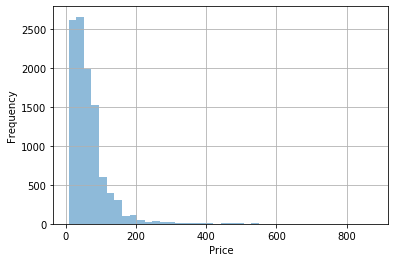

In [74]:
dfTrain['Price'].plot.hist(alpha=0.5, bins=40, grid = True)
plt.xlabel('Price')

plt.show()

In [75]:
print(f"Número de filas con precio mayor de 300 euros {len(dfTrain[dfTrain['Price'] > 300])}")

Número de filas con precio mayor de 300 euros 85


In [76]:
len(dfTrain[dfTrain['Price'] <= 300])

10474

In [77]:
dfTrain = dfTrain[dfTrain['Price'] < 300]

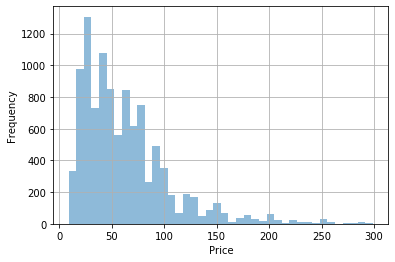

In [78]:
dfTrain['Price'].plot.hist(alpha=0.5, bins=40, grid = True)
plt.xlabel('Price')

plt.show()

In [79]:
len(dfTrain) - dfTrain.count()

Host Response Rate             1289
Host Listings Count               3
Neighbourhood Cleansed            0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Bathrooms                        38
Bedrooms                         18
Beds                             35
Bed Type                          0
Price                             0
Security Deposit               5950
Cleaning Fee                   4242
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Accuracy         2244
Review Scores Cleanliness      2239
Review Scores Checkin          2250
Review Scores Communication    2240
Review Scores Location         2253
Review Scores Value            2252
Cancellation Policy         

In [80]:
dfTrain.isnull().any()

Host Response Rate              True
Host Listings Count             True
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                       True
Bedrooms                        True
Beds                            True
Bed Type                       False
Price                          False
Security Deposit                True
Cleaning Fee                    True
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy          True
Review Scores Cleanliness       True
Review Scores Checkin           True
Review Scores Communication     True
Review Scores Location          True
Review Scores Value             True
C

In [81]:
dfTrain.dtypes

Host Response Rate             float64
Host Listings Count            float64
Neighbourhood Cleansed          object
Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Price                          float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 30                  int64
Availability 365                 int64
Number of Reviews                int64
Review Scores Accuracy         float64
Review Scores Cleanliness      float64
Review Scores Checkin          float64
Review Scores Communication    float64
Review Scores Location   

In [82]:
categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','AireAcondicionado','Internet','Parking','Cancellation Policy']
# En train creamos un dict para usarlo después en test
# ESTO ES EN TRAIN.CSV!
mean_map = {}
for c in categorical:
    mean = dfTrain.groupby(c)['Price'].mean()
    dfTrain[c] = dfTrain[c].map(mean)    
    mean_map[c] = mean

In [83]:
dfTrain.fillna(dfTrain.mean(), inplace=True)
dfTrain.isnull().any()

Host Response Rate             False
Host Listings Count            False
Neighbourhood Cleansed         False
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Bathrooms                      False
Bedrooms                       False
Beds                           False
Bed Type                       False
Price                          False
Security Deposit               False
Cleaning Fee                   False
Guests Included                False
Extra People                   False
Minimum Nights                 False
Maximum Nights                 False
Availability 30                False
Availability 365               False
Number of Reviews              False
Review Scores Accuracy         False
Review Scores Cleanliness      False
Review Scores Checkin          False
Review Scores Communication    False
Review Scores Location         False
Review Scores Value            False
C

In [84]:
dfTrain.describe()

Host Response Rate  Host Listings Count  Neighbourhood Cleansed  \
count        10456.000000         10456.000000            10456.000000   
mean            94.874768             9.884818               62.708971   
std             14.107228            27.827513               15.879630   
min              0.000000             0.000000               18.500000   
25%             94.874768             1.000000               52.900000   
50%            100.000000             2.000000               62.545455   
75%            100.000000             5.000000               73.882893   
max            100.000000           265.000000              127.666667   

           Latitude     Longitude  Property Type     Room Type     Bathrooms  \
count  10456.000000  10456.000000   10456.000000  10456.000000  10456.000000   
mean      40.420384     -3.697110      62.708971     62.708971      1.241841   
std        0.019839      0.023284       6.072460     24.772795      0.576184   
min       40.332908     -3.835498      17.000000     26.213793      0.000000   
25%       40.410023     -3.707775      64.462267     32.807371      1.000000   
50%       40.418344     -3.701601      64.462267     83.056882      1.000000   
75%       40.427646     -3.693891      64.462267     83.056882      1.000000   
max       40.514247     -3.575142     145.000000     83.056882      8.000000   

           Bedrooms          Beds      Bed Type         Price  \
count  10456.000000  10456.000000  10456.000000  10456.000000   
mean       1.274382      1.957202     62.708971     62.708971   
std        0.787405      1.438918      1.473061     42.501701   
min        0.000000      1.000000     43.666667      9.000000   
25%        1.000000      1.000000     62.907375     30.000000   
50%        1.000000      1.000000     62.907375     52.000000   
75%        1.000000      2.000000     62.907375     80.000000   
max       10.000000     16.000000     62.907375    299.000000   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count      10456.000000  10456.000000     10456.000000  10456.000000   
mean         181.908344     28.979562         1.557957      7.376243   
std           70.988593     17.994979         1.027730     10.027289   
min           70.000000      5.000000         1.000000      0.000000   
25%          181.908344     20.000000         1.000000      0.000000   
50%          181.908344     28.979562         1.000000      0.000000   
75%          181.908344     30.000000         2.000000     14.000000   
max          990.000000    300.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 30  Availability 365  \
count    10456.000000    10456.000000     10456.000000      10456.000000   
mean         3.064843      976.886190         8.641163        205.319434   
std         14.176135     9981.211793         9.015337        127.140279   
min          1.000000        1.000000         0.000000          0.000000   
25%          1.000000      365.000000         0.000000         83.000000   
50%          2.000000     1125.000000         6.000000        248.000000   
75%          3.000000     1125.000000        13.000000        320.000000   
max       1125.000000  1000000.000000        30.000000        365.000000   

       Number of Reviews  Review Scores Accuracy  Review Scores Cleanliness  \
count       10456.000000            10456.000000               10456.000000   
mean           23.317521                9.404774                   9.319703   
std            38.504514                0.831617                   0.895023   
min             0.000000                2.000000                   2.000000   
25%             1.000000                9.000000                   9.000000   
50%             7.000000                9.404774                   9.319703   
75%            28.000000               10.000000                  10.000000   
max           356.000000               10.000000                  1

In [85]:
cols = ['Price']  + [col for col in dfTrain if col != 'Price']
dfTrain = dfTrain[cols]

In [86]:
dfTrain.describe()

Price  Host Response Rate  Host Listings Count  \
count  10456.000000        10456.000000         10456.000000   
mean      62.708971           94.874768             9.884818   
std       42.501701           14.107228            27.827513   
min        9.000000            0.000000             0.000000   
25%       30.000000           94.874768             1.000000   
50%       52.000000          100.000000             2.000000   
75%       80.000000          100.000000             5.000000   
max      299.000000          100.000000           265.000000   

       Neighbourhood Cleansed      Latitude     Longitude  Property Type  \
count            10456.000000  10456.000000  10456.000000   10456.000000   
mean                62.708971     40.420384     -3.697110      62.708971   
std                 15.879630      0.019839      0.023284       6.072460   
min                 18.500000     40.332908     -3.835498      17.000000   
25%                 52.900000     40.410023     -3.707775      64.462267   
50%                 62.545455     40.418344     -3.701601      64.462267   
75%                 73.882893     40.427646     -3.693891      64.462267   
max                127.666667     40.514247     -3.575142     145.000000   

          Room Type     Bathrooms      Bedrooms          Beds      Bed Type  \
count  10456.000000  10456.000000  10456.000000  10456.000000  10456.000000   
mean      62.708971      1.241841      1.274382      1.957202     62.708971   
std       24.772795      0.576184      0.787405      1.438918      1.473061   
min       26.213793      0.000000      0.000000      1.000000     43.666667   
25%       32.807371      1.000000      1.000000      1.000000     62.907375   
50%       83.056882      1.000000      1.000000      1.000000     62.907375   
75%       83.056882      1.000000      1.000000      2.000000     62.907375   
max       83.056882      8.000000     10.000000     16.000000     62.907375   

       Security Deposit  Cleaning Fee  Guests Included  Extra People  \
count      10456.000000  10456.000000     10456.000000  10456.000000   
mean         181.908344     28.979562         1.557957      7.376243   
std           70.988593     17.994979         1.027730     10.027289   
min           70.000000      5.000000         1.000000      0.000000   
25%          181.908344     20.000000         1.000000      0.000000   
50%          181.908344     28.979562         1.000000      0.000000   
75%          181.908344     30.000000         2.000000     14.000000   
max          990.000000    300.000000        16.000000    276.000000   

       Minimum Nights  Maximum Nights  Availability 30  Availability 365  \
count    10456.000000    10456.000000     10456.000000      10456.000000   
mean         3.064843      976.886190         8.641163        205.319434   
std         14.176135     9981.211793         9.015337        127.140279   
min          1.000000        1.000000         0.000000          0.000000   
25%          1.000000      365.000000         0.000000         83.000000   
50%          2.000000     1125.000000         6.000000        248.000000   
75%          3.000000     1125.000000        13.000000        320.000000   
max       1125.000000  1000000.000000        30.000000        365.000000   

       Number of Reviews  Review Scores Accuracy  Review Scores Cleanliness  \
count       10456.000000            10456.000000               10456.000000   
mean           23.317521                9.404774                   9.319703   
std            38.504514                0.831617                   0.895023   
min             0.000000                2.000000                   2.000000   
25%             1.000000                9.000000                   9.000000   
50%             7.000000                9.404774                   9.319703   
75%            28.000000               10.000000                  10.000000   
max           356.000000               10.000000                  10.00000

In [87]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data = dfTrain.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,1:]      # nos quedamos con el resto

feature_names = dfTrain.columns[1:]



In [88]:
X_train

array([[100.        ,   2.        ,  94.42647059, ...,  63.09662854,
         62.86223546,   5.        ],
       [100.        ,   1.        ,  82.2992126 , ...,  63.09662854,
         62.86223546,   4.        ],
       [100.        ,  16.        ,  31.39622642, ...,  63.09662854,
         60.64265928,   4.        ],
       ...,
       [100.        ,   1.        ,  73.88289323, ...,  63.09662854,
         62.86223546,   4.        ],
       [100.        ,   1.        ,  73.88289323, ...,  63.09662854,
         62.86223546,   4.        ],
       [100.        ,  14.        ,  65.69158879, ...,  63.09662854,
         62.86223546,   5.        ]])

In [89]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -627.266
best parameters: {'alpha': 0.16847311747385427}


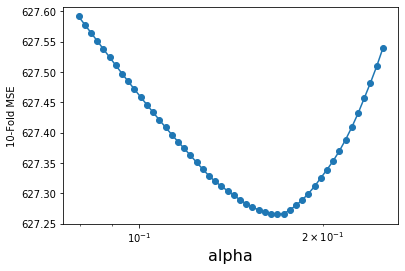

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#alpha_vector = np.logspace(-1.5,-1,20)
alpha_vector = np.logspace(-1.1,-0.6,50)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((0,1))
plt.show()

In [91]:
dfTest = pd.read_csv('./test.csv', sep=';', decimal='.')
columnas_borrar = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',  'Calendar Updated', 'Calendar last Scraped', 
     'Geolocation'
]
dfTest.drop(columnas_borrar, axis=1, inplace=True)
columnas_texto = [
    'Name', 'Summary','Description', 'Notes', 'Transit', 'Access', 'Interaction','House Rules', 
     'Host Location', 'Host About', 'Host Response Time', 'Host Verifications','Space','Neighborhood Overview'
]
dfTest.drop(columnas_texto, axis=1, inplace=True)

df_Madrid = dfTest[dfTest['City']!='Madrid']

dfTest.drop(df_Madrid.index, inplace = True)

columnas_loc = [
    'City', 'Country','Country Code', 'State', 'Market', 'Smart Location'
]
dfTest.drop(columnas_loc, axis=1, inplace=True)

columnas_nulos = [
    'Host Acceptance Rate', 'Square Feet','Has Availability','License', 'Jurisdiction Names'
]
dfTest.drop(columnas_nulos, axis=1, inplace=True)

dfTest.drop([
    'Weekly Price', 'Monthly Price'
], axis=1, inplace=True)

dfTest.drop([
    'First Review', 'Last Review'
], axis=1, inplace=True)

dfTest['Features'].fillna("", inplace=True) 
dfTest['Features'] = dfTrain['Features'].apply(lambda x: len(str(x).split(',')))

dfTest['Amenities'].fillna("", inplace=True)
dfAireAcondicionado = dfTest['Amenities'].str.contains("conditioning") 
dfTest['AireAcondicionado']=dfAireAcondicionado

dfInternet = dfTest['Amenities'].str.contains("Internet") 
dfTest['Internet']=dfInternet

dfParking=dfTest['Amenities'].str.contains("Free parking") 
dfTest['Parking']=dfParking

dfTest.drop([
    'Amenities'
], axis=1, inplace=True)

dfTest.drop(['Experiences Offered'], axis=1, inplace=True)

dfTest.drop(['Street'], axis=1, inplace=True)

dfTest.drop(['Zipcode'], axis=1, inplace=True)

columnas_cr = [
    'Host Total Listings Count', 'Calculated host listings count','Accommodates'
]
dfTest.drop(columnas_cr, axis=1, inplace=True)

dfTest.drop(['Availability 60'], axis=1, inplace=True)

dfTest.drop(['Availability 90'], axis=1, inplace=True)

dfTest.drop(['Review Scores Rating'], axis=1, inplace=True)

dfTest.drop(['Neighbourhood Group Cleansed','Neighbourhood'], axis=1, inplace=True)

dfTest['Host Since'].dropna(inplace=True)
dfTest['Host Since'] = dfTest['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
dfTest['Host year'] = dfTest['Host Since'].apply(lambda x: 2020 - x.year)
dfTest.drop(['Host Since'], axis=1, inplace=True)

dfTest = dfTest[dfTest['Price'] < 300]

categorical = ['Neighbourhood Cleansed', 'Property Type', 'Room Type','Bed Type','AireAcondicionado','Internet','Parking','Cancellation Policy']
# En train creamos un dict para usarlo después en test
# ESTO ES EN TRAIN.CSV!
   
  
for c in categorical:
    dfTest[c] = dfTest[c].map(mean_map[c])

    
dfTest.fillna(dfTest.mean(), inplace=True)

cols = ['Price']  + [col for col in dfTest if col != 'Price']
dfTest = dfTest[cols]



In [92]:
print(dfTrain.shape, dfTest.shape)

(10456, 34) (2617, 34)


In [93]:
data_test = dfTest.values

y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

feature_names_test = dfTest.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

### Lasso

In [94]:
from sklearn.metrics import mean_squared_error 


alpha_optimo = grid.best_params_['alpha']#*10 #*100
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 621
MSE Modelo Lasso (test) : 628
RMSE Modelo Lasso (train): 24.9
RMSE Modelo Lasso (test) : 25.1
Host Response Rate -0.40222914564109846
Host Listings Count 1.8994838857926128
Neighbourhood Cleansed 8.369417416403724
Latitude -0.3641370575963721
Longitude -0.0
Property Type 0.01619277107880015
Room Type 15.515504246707001
Bathrooms 3.3922506665456154
Bedrooms 10.095701713276908
Beds 2.0715234592299963
Bed Type 0.2056687575025993
Security Deposit 2.7518597383318397
Cleaning Fee 9.108733510472563
Guests Included 3.7382265945885447
Extra People -1.497507255065933
Minimum Nights -0.16245935088841618
Maximum Nights -0.0
Availability 30 4.294589933872842
Availability 365 0.2982378696862266
Number of Reviews -1.938760856553523
Review Scores Accuracy 1.479783885158557
Review Scores Cleanliness 1.3763648024881965
Review Scores Checkin -0.22490780578988948
Review Scores Communication -0.11081320451145128
Review Scores Location 0.582924313386423
Review Scores Value -0.0

In [95]:
dfTrain['Price'].describe()

count    10456.000000
mean        62.708971
std         42.501701
min          9.000000
25%         30.000000
50%         52.000000
75%         80.000000
max        299.000000
Name: Price, dtype: float64

### Árbol de decision

best mean cross-validation score: 0.630
best parameters: {'max_depth': 7}


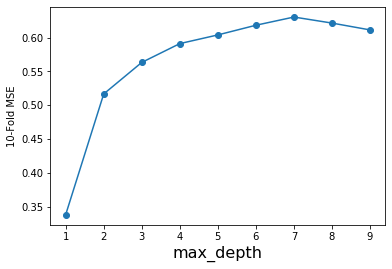

In [130]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')

plt.show()

In [131]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.7201577918552294
Test:  0.624684753387639


In [132]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)
treeModel.fit(X_train, y_train)

y_predict = treeModel.predict(X_test)
tr_testing_set_score = treeModel.score(X_test, y_test)
tr_median_abs_error = median_absolute_error(y_test, y_predict)
tr_mean_abs_error = mean_absolute_error(y_test, y_predict)
print('The R^2 score on our testing data is: ' + str(round(tr_testing_set_score,3)))
print('The median absolute error on our testing data is: ' + str(round(tr_median_abs_error,3)))
print('The avg absolute error on our testing data is: ' + str(round(tr_mean_abs_error,3)))

The R^2 score on our testing data is: 0.637
The median absolute error on our testing data is: 10.637
The avg absolute error on our testing data is: 16.404


### Random forest

best mean cross-validation score: 0.735
best parameters: {'max_depth': 14}


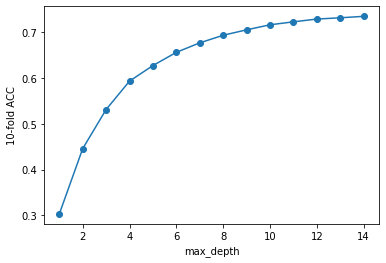

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Tu código aquí
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [108]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.90354132500806
Test:  0.7345100506868023


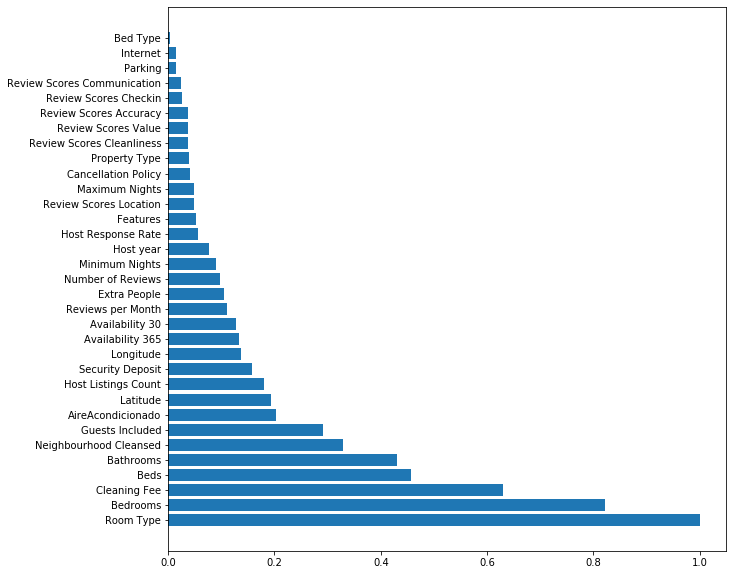

In [100]:

features = dfTrain.columns.drop(['Price'])
importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

rf = RandomForestRegressor(oob_score = True)
rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)
rf_testing_set_score = rf.score(X_test, y_test)
rf_median_abs_error = median_absolute_error(y_test, y_predict)
rf_mean_abs_error = mean_absolute_error(y_test, y_predict)
print('The R^2 score on our testing data is: ' + str(round(rf_testing_set_score,3)))
print('The median absolute error on our testing data is: ' + str(round(rf_median_abs_error,3)))
print('The avg absolute error on our testing data is: ' + str(round(rf_mean_abs_error,3)))

R^2 en datos de test: 0.715
Mediana del error en datos de test: 9.8
Media del error en datos de test: 14.741


## Boosted Trees

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [1500,2000, 2500]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.746
best parameters: {'learning_rate': 0.05, 'n_estimators': 1500}


In [122]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

y_predict = bt.predict(X_test)
bt_testing_set_score = bt.score(X_test, y_test)
bt_median_abs_error = median_absolute_error(y_test, y_predict)
bt_mean_abs_error = mean_absolute_error(y_test, y_predict)

print('The R^2 score on our testing data is: ' + str(round(bt_testing_set_score,3)))
print('The median absolute error on our testing data is: ' + str(round(bt_median_abs_error,3)))
print('The avg absolute error on our testing data is: ' + str(round(bt_mean_abs_error,3)))

The R^2 score on our testing data is: 0.733
The median absolute error on our testing data is: 9.42
The avg absolute error on our testing data is: 14.325


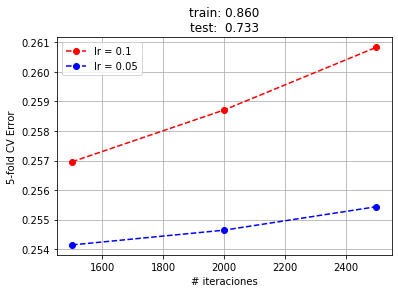

In [123]:
error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

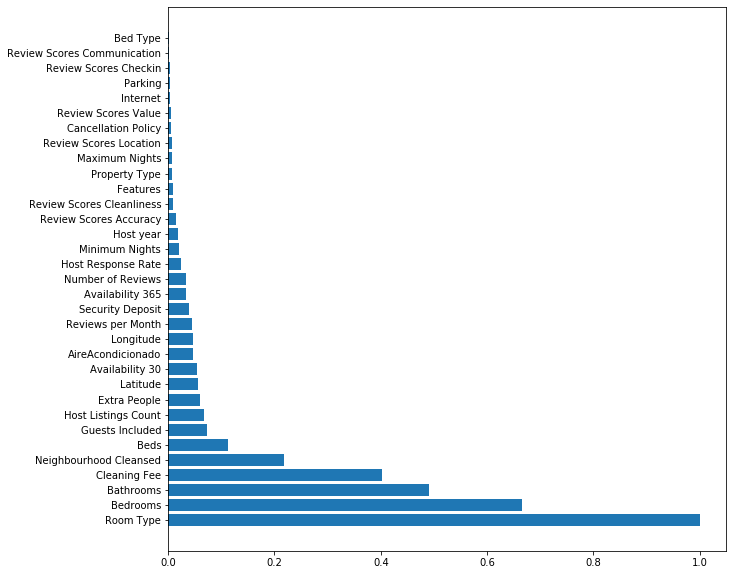

In [124]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

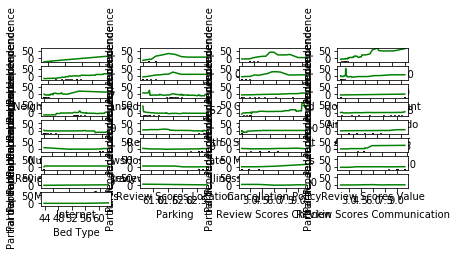

In [125]:
from sklearn.inspection import plot_partial_dependence

fig= plot_partial_dependence(bt, X_train, indices, feature_names=feature_names,
                                 percentiles=(0.0, 1.0), n_cols = 4)

plt.show()

## SVR

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 49.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

best mean cross-validation score: 0.709
best parameters: {'C': 100.0, 'gamma': 0.026826957952797246}


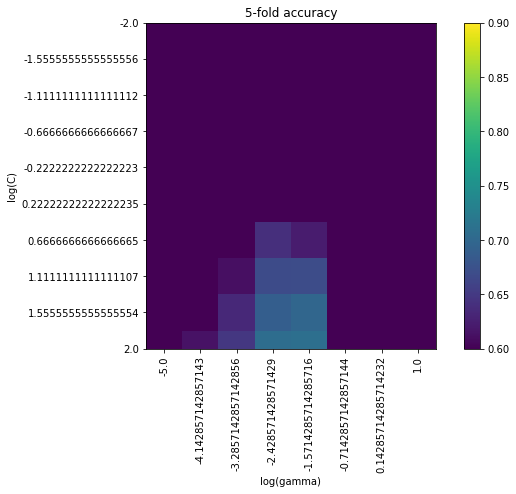

In [127]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [128]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Acc (TEST): 0.69
